In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sales = pd.read_csv(r"E:\Integrated Retail Analytics\sales data-set.csv")
stores = pd.read_csv(r"E:\Integrated Retail Analytics\stores data-set.csv")
features = pd.read_csv(r"E:\Integrated Retail Analytics\Features data set.csv")

print(" Files Loaded Successfully")

display(sales.head())
display(stores.head())
display(features.head())

 Files Loaded Successfully


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
print("Sales missing values:\n", sales.isnull().sum())
print("\nStores missing values:\n", stores.isnull().sum())
print("\nFeatures missing values:\n", features.isnull().sum())

print("\nSales Info:")
print(sales.info())

print("\nStores Info:")
print(stores.info())

print("\nFeatures Info:")
print(features.info())

Sales missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Stores missing values:
 Store    0
Type     0
Size     0
dtype: int64

Features missing values:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Sales Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

St

In [8]:
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)

print(sales['Date'].head())
print(features['Date'].head())

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]


In [10]:
for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    features[col] = features[col].fillna(0)

features['CPI'] = features['CPI'].ffill()
features['Unemployment'] = features['Unemployment'].ffill()

data = pd.merge(sales, stores, on='Store', how='left')
data = pd.merge(data, features, on=['Store','Date','IsHoliday'], how='left')

print(" Final Data Shape:", data.shape)
display(data.head())

 Final Data Shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [11]:
print(data.describe())
print("\nUnique values per column:\n", data.nunique())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  14

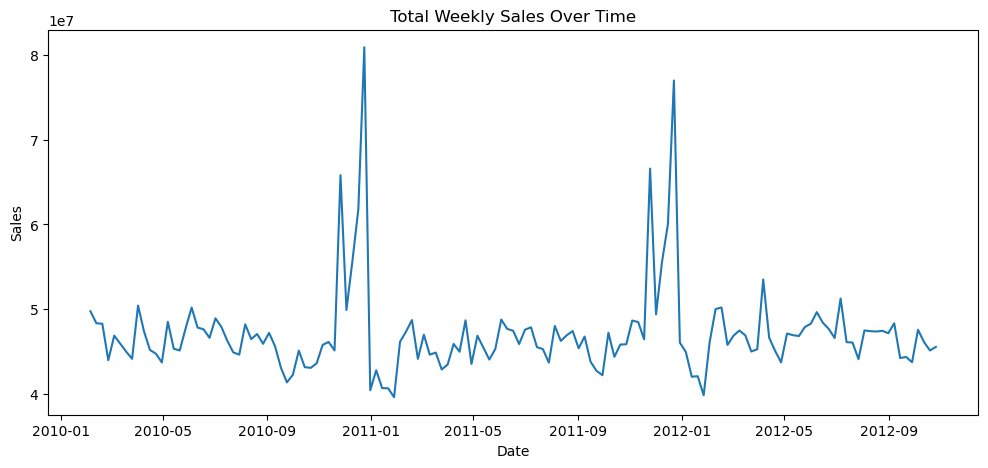

In [12]:
weekly_sales = data.groupby("Date")['Weekly_Sales'].sum()

plt.figure(figsize=(12,5))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

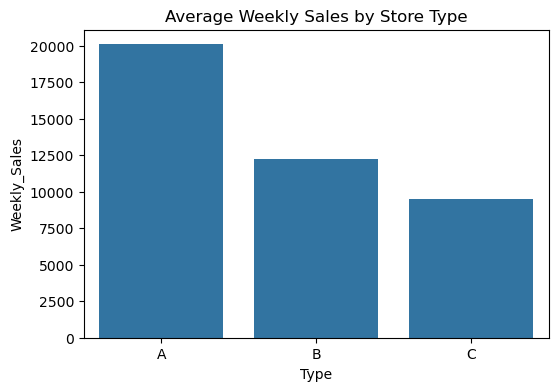

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x="Type", y="Weekly_Sales", data=data, estimator=np.mean, errorbar=None)
plt.title("Average Weekly Sales by Store Type")
plt.show()

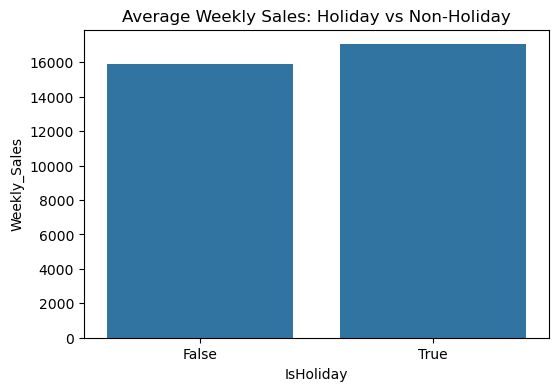

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x="IsHoliday", y="Weekly_Sales", data=data, estimator=np.mean, errorbar=None)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.show()

In [15]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [16]:
data['Type'] = data['Type'].map({'A':1, 'B':2, 'C':3})

In [17]:
data['IsHoliday'] = data['IsHoliday'].astype(int)

In [18]:
print(" Final columns after Feature Engineering:")
print(data.columns)

display(data.head())

 Final columns after Feature Engineering:
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Week'],
      dtype='object')


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9


In [19]:
X = data[['Store','Dept','Size','Temperature','Fuel_Price','CPI','Unemployment',
          'IsHoliday','Type','Year','Month','Week','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
y = data['Weekly_Sales']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337256, 17)
Test shape: (84314, 17)


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)  

In [26]:
from sklearn.metrics import r2_score, root_mean_squared_error

print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))

print("\nRandom Forest Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))

Linear Regression Results:
R² Score: 0.08955646039425125
RMSE: 21789.21514321595

Random Forest Results:
R² Score: 0.9734789928709641
RMSE: 3718.8621807881623


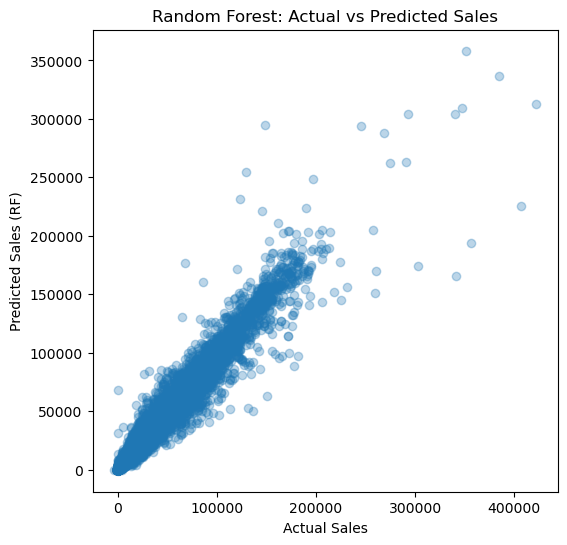

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (RF)")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.show()

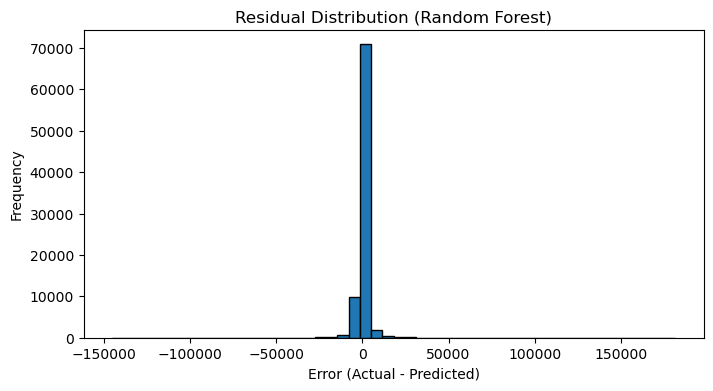

In [28]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,4))
plt.hist(residuals, bins=50, edgecolor='k')
plt.title("Residual Distribution (Random Forest)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

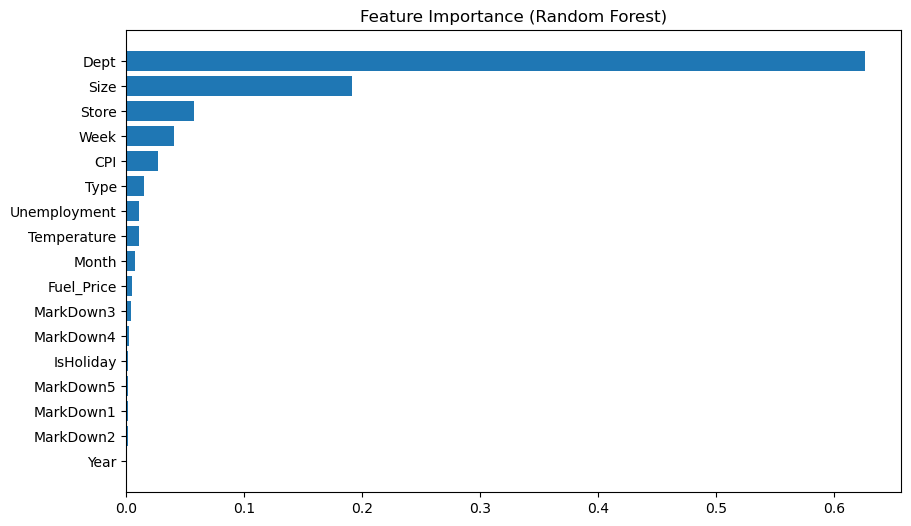

In [29]:
import pandas as pd
import numpy as np

importances = rf.feature_importances_
features_list = X.columns

fi_df = pd.DataFrame({'Feature': features_list, 'Importance': importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# Insights & Conclusion

### Model Performance
- Linear Regression performed poorly (R² ~ 0.09, RMSE ~ 21,789).
- Random Forest performed very well (R² ~ 0.97, RMSE ~ 3,719).

### Key Insights
1. Weekly sales peak during holidays.
2. Store Type A stores generate the highest average sales.
3. Holiday weeks have significantly higher sales compared to non-holidays.
4. Random Forest shows that Store Size, Store Type, and CPI are the most important predictors.

### Business Conclusion
- Machine Learning can be used to accurately forecast sales.
- Retailers can optimize **inventory, promotions, and store operations** based on sales predictions.
- Random Forest is the most suitable model for this dataset.